# 169. Majority Element
Given an array nums of size n, return the majority element.

In [35]:
def majorityElement(nums):
    from collections import defaultdict
    count_dict = defaultdict(int)
    for n in nums:
        count_dict[n] +=1
#     return max(count_dict, key= count_dict.get)
        
#     return count_dict
    
    

In [48]:
def majorityElement_Moore(nums):
    candidate = nums[0]
    counter = 0
    
    for n in nums:
        if counter ==0:
            candidate = n
        
        if n == candidate:
            counter +=1
        else:
            counter -=1
    return candidate


In [49]:
nums = [2,2,3,3,3,2,2]
# di = majorityElement(nums)
majorityElement_Moore(nums)

2

In [41]:
# only use max, only compare the index value
print(max(di))
# When using key, are comparing the "key indicated"
print(max(di, key=di.get))

3
2


# 229. Majority Element II
Given an integer array of size n, find all elements that appear more than ⌊ n/3 ⌋ times.


In [57]:
def majorityElement(nums):
    from collections import defaultdict
    count_dict = defaultdict(int)
    for n in nums:
        count_dict[n] +=1
        
    return [key for key,val in count_dict.items() if val>len(nums)/3]
    

In [55]:
def majorityElement_moore(nums):
    from collections import defaultdict
    
    count_dict = defaultdict(int)
    
    for n in nums:
        count_dict[n] +=1
#         print(count_dict)
        if len(count_dict) == 3:
            tmp_dict = defaultdict(int)
            for key, val in count_dict.items():
                if val >1:
                    tmp_dict[key] = val-1
            count_dict = tmp_dict
    return [key for key,val in count_dict.items() if nums.count(key) > len(nums)/3]

In [58]:
nums = [2,4,3,3,5,5,2,2]

majorityElement(nums)

[2]

In [54]:
len(nums)/3


2.6666666666666665

In [60]:
nums = [2,4,3,3,5,5,2,2]
nums.count(2)

3

# 274. H-Index
A scientist has an index h if **h of their n papers have at least h citations each, and the other n − h papers have no more than h citations each.**  
If there are several possible values for h, the maximum one is taken as the h-index.  

citations = [3,0,6,1,5]  
    
    [3,0,6,1,5] means the researcher has 5 papers in total and each of them had received 3, 0, 6, 1, 5 citations respectively.  
    Since the researcher has 3 papers with at least 3 citations each and the remaining two with no more than 3 citations each, their h-index is 3.
    
看一個人的n份 paper, 其中有h 份, 至少超過h個citation, while 其他 n-h中, 沒有超過 h citation的paper

[3,0,6,1,5], if all 5 books larger than 5, hIndex is 5
highest is the len(citations)



In [116]:
def hIndex(citations):
    citations = sorted(citations, reverse=True)
    if citations[-1] >= len(citations):
        return len(citations)
    hindex = 0
    # KEY, if i > 第 i 大的值, 則滿足hindex定義
    # Without sorted is O(n)
    for i in range(len(citations)):
        if i >= citations[i]:
            hindex = i
            break
    return hindex


In [87]:
#  NO sorted
def hIndex(citations):
    # The highest h-index for is len(citation)
    hindex = len(citations)
    if min(citations) >= hindex:
        return hindex
    # Try hindex candidate
#     hindex = max([c for c in citations if c < hindex])
    hindex-=1
    print(hindex)
    
    # 如果citation超過 hindx的paper 數量, 沒有>= hindex 則要進loop, 每次將hindex -1
    while len([c for c in citations if c >= hindex]) < hindex:
        print('hindex:',hindex)
        print([c for c in citations if c >= hindex], len([c for c in citations if c >= hindex]))
        hindex-=1
    
    return hindex

In [92]:
citations = [4,7,0,0]
hIndex(citations)

2

In [89]:
sorted(citations, reverse=True)

[7, 4, 0, 0]

## 275. H-Index II
Given an array of integers citations where citations[i] is the number of citations a researcher received for their ith paper and citations is sorted in an **ascending** order, return compute the researcher's h-index 
<br>

You must write an algorithm that runs in logarithmic time.


In [160]:
# Binary Search can reduce it to log(n)
def hindex(citations):
    n = len(citations)
    l, r = 0, n-1
    while l <= r:
        mid = (l + r) //2
        print(l, r,mid, ' ', citations[mid])
        # 如果 citations 數量 剛剛好等於 比這個值 還大的 papers的數量, 
        # 則成功找到 hindex
        if citations[mid] == (n - mid):
            return n -mid
        # citation 數量大於 多少篇paper滿足條件
        if citations[mid] > (n - mid):
            r = mid -1
        else:
            # KEY最後個 l 的 mid+1 是關鍵, 表示這個index 的值, 不夠比剩餘的大
            l = mid +1

    # KEY, 最後break 這個while 的時候, l 會 >= r
    # 這時候的 l 是大於這個index 的數量, 所有值都大於 剩餘數量
    print(l, r, ' ', citations[mid])
    
    return n - l

            
    
            
            


In [161]:
# Following is O(n)
def hindex_N(citations):
    if min(citations)>=len(citations):
        return len(citations)
    
#     print(citations)
    res = 0
    for i in range(1,len(citations)):
        # 第 i 大的>
#         print(i, citations[-i])
        if citations[-i] >= i:
            res = i
            
    return res
    

In [163]:
citations = [1,3,5,6,9]
hindex(citations)

0 4 2   5
0 1 0   1
1 1 1   3
2 1   3


3

In [122]:
5//2

2

# 217 Contains Duplicate
Given an integer array nums, return true if any value appears at least twice in the array, and return false if every element is distinct.

In [17]:
# Bad proficiency
def containsDuplicate(nums):
    from collections import defaultdict
    n_dict = defaultdict(int)
    for n in nums:
        n_dict[n]+=1
    
    return max(n_dict.values())>1
    


In [24]:
def containsDuplicate(nums):
    return len(nums) != len(set(nums))

In [25]:
nums = [1,2,3,1]
containsDuplicate(nums)

True

## 219. Contains Duplicate II
Given an integer array nums and an integer k, return true if there are two distinct indices i and j in the array such that   
nums[i] == nums[j] and **abs(i - j) <= k.**  
也就是 自己前k 跟 後k裡面有沒有 duplicate


In [52]:
# Time Exceed
def containsNearbyDuplicate(nums, k):
    for i,n in enumerate(nums):
        left = 0 if i-k<0 else i-k
        right = len(nums) if i+k>=len(nums) else i+k
#         print(i, left, right)
        for idx in range(left, right):
#             print(nums[idx], n)
            if nums[idx] == n and idx!=i:
                return True

                
    return False
            
    

In [84]:
def containsNearbyDuplicate(nums, k):
    n_dic = {}
    # key, n_dic 是存這個植在第幾個位置
    for i, v in enumerate(nums):
        if v in n_dic and i - n_dic[v] <=k:
            return True
        n_dic[v] = i
    return False
        


In [85]:
nums = [1,2,3,1]; k = 3
# nums = [1,0,1,1]; k = 1
# nums = [1,2,3,1,2,3]; k = 2
containsNearbyDuplicate(nums,k)

True

## <a href='https://leetcode.com/problems/contains-duplicate-iii/discuss/828127/PythonGo-O(n)-by-sliding-window-and-bucket-w-Comment'> 220. Contains Duplicate III</a>
Given an integer array nums and two integers k and t, return true if there are two distinct indices i and j in the array such that  
**abs(nums[i] - nums[j]) <= t**  
**and abs(i - j) <= k.**
<br>
 
NOTE: 以除法來想, 每個數值 除以 t, 會落在不同區間

In [122]:
# Bad Efficiency
def containsNearbyAlmostDuplicate(nums, k, t):
    if t == 0:
        n_dic = {}
        # key, n_dic 是存這個植在第幾個位置
        for i, v in enumerate(nums):
            if v in n_dic and i - n_dic[v] <=k:
                return True
            n_dic[v] = i
        return False

    
    # With Large K, will exceed Time limit
    window_list = []
    for n in nums:
        if len(window_list) >= k+1:
            window_list.pop(0)
        if window_list:
            for win_n in window_list:
                if abs(win_n - n) <=t:
                    return True
        window_list.append(n)
    return False
        


In [129]:
# 以除法來想, 如果
def containsNearbyAlmostDuplicate(nums, k, t):
    if t == 0 and len(nums) == len(set(nums)):
        # Quick response for t = 0
        # t = 0 requires at least one pair of repeated element
        return False
    
    size = len(nums)
    bucket = {}
    #KEY width = t +1,  prevent t==0, and following abs(..) < width not <=
    width = t+1
    
    for idx,num in enumerate(nums):
        bucket_idx = num // width
        if bucket_idx in bucket:
            # two numbers in the same bucket, gap must be smaller than width
            return True
        elif bucket_idx+1 in bucket and abs(num - bucket[bucket_idx+1]) <width:
            return True
        elif bucket_idx-1 in bucket and abs(num - bucket[bucket_idx-1]) <width:
            return True
        
        bucket[bucket_idx] = num
        
        if idx>=k:
            # delete old number whose index distance larger than k
            del bucket[ nums[idx-k] // width]
    return False
        
            


In [130]:
# nums = [1,0,1,1];k = 1; t = 2
# nums = [1,5,9,1,5,9]; k = 2; t = 3
nums = [1,2,3,1]; k = 3; t = 0
# nums = [4,1,6,3]; k = 100; t = 1

containsNearbyAlmostDuplicate(nums,k,t)

True

# 55. Jump Game
Given an array of non-negative integers nums, you are initially positioned at the first index of the array.  

Each element in the array represents your maximum jump length at that position.  

Determine if you are able to reach the last index.  


In [264]:
# Exceed Time limit
def canJump(nums):
    reach_list = [False for i in range(len(nums))]
    reach_list[0] = True
#     print(reach_list)
    for i in range(len(nums)):
        if reach_list[-1] == True:
            return True
        
        if reach_list[i] is True:
            upper = i + nums[i] +1
            upper = len(nums) if upper >= len(nums) else upper
            reach_list[i:upper] = [True for i in range(upper-i)]
#             print(reach_list)
        
    return False
        


In [266]:
def canJump(nums):
    m = 0
    # Going forwards. m tells the maximum index we can reach so far.
    for i, n in enumerate(nums):
        if i > m:  # 也就是來到了 到不了的地方
            return False
        m = max(m, i+n)
    return True


In [267]:
nums = [3,2,1,0,4]
# nums = [2,3,1,1,4]
canJump(nums)

False

## <a href='https://leetcode.com/problems/jump-game-ii/discuss/485780/Python-O(-n-)-sol.-based-on-greedy-of-coverage.-90%2B-With-explanation'>45. Jump Game II</a>
Given an array of non-negative integers nums, you are initially positioned at the first index of the array.  

Each element in the array represents your maximum jump length at that position.  

**Your goal is to reach the last index in the minimum number of jumps.**

**You can assume that you can always reach the last index.**

In [296]:
# Time O(N^2), SPACE O(N)
def jump(nums):
#     dp[i], 表示到第i 最少需要多少步
#     這是 top down的想法
#     dp[i] = min(dp[i-1]+1, .....)
#    以buttom up 來寫, 就是每次看這個地方能走到的地方, 在去更新dp裡的值
    
    dp = [float('inf') for _ in range(len(nums))]
    dp[0] = 0
    print(dp)
    for i, n in enumerate(nums):
#         print('---',i)
        if dp[-1] != float('inf'):
                return dp[-1]
            
        upper = i + nums[i] +1
        upper = len(nums) if upper >= len(nums) else upper
        for j in range(i, upper):
            # 比較從上一步走過來 比較小
            dp[j] = min(dp[i]+1, dp[j])
#             print(j)
#         print(dp)
    return dp
        
        
        
        

In [300]:
# TIME O(N), SPACE O(1)
def jump(nums):
    size = len(nums)
    # destination is last index
    destination = size - 1
    # record of current coverage, record of last jump index
    cur_coverage, last_jump_index = 0, 0
    # counter for jump
    times_of_jump = 0
     # Quick response if start index == destination index == 0
    if size == 1:
        return 0
    
    # Greedy strategy: extend coverage as long as possible with lazy jump
    for i in range(0, size):
        # Extend the current coverate as further as possible
        cur_coverage = max(i + nums[i], cur_coverage)
        
        # 跳到最遠的地方了, forced to jump (by lazy jump) to extend coverage
        if i == last_jump_index:
            # update last jump index
            last_jump_index = cur_coverage

            # update counter of jump by +1
            times_of_jump += 1

            # check if reached destination already
            if cur_coverage >= destination:
                    return times_of_jump
            
    return times_of_jump
    

In [301]:
nums = [2,3,1,1,4]
nums = [2,3,0,1,4]
nums = [2,13,1,4]

jump(nums)

2

# 11. Container With Most Water
Given n non-negative integers a1, a2, ..., an , where each represents a point at coordinate (i, ai). n vertical lines are drawn such that the two endpoints of the line i is at (i, ai) and (i, 0).  
Find two lines, which, together with the x-axis forms a container, such that the container contains the most water.
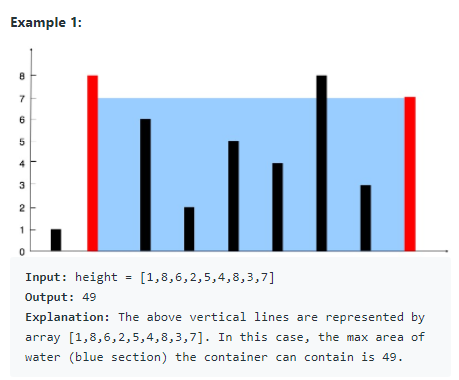

In [16]:
def maxArea(height):
    # Brute Force -- Exceed Time limitation
    maxarea = float('-inf')
    pre_min = 0
    for i in range(len(height)):
        if height[i] < pre_min:
            continue
        for j in range(len(height)-1, i , -1):
            if height[j] < pre_min:
                continue 
            area = (j - i) * min(height[i], height[j])
            if area > maxarea:
                pre_min =  min(height[i], height[j])
                maxarea = area
    return maxarea
            


In [28]:
def maxArea(height):
    # O(n) Solution
    max_area = area = 0
    left, right = 0, len(height) -1
    while left < right:
        l, r = height[left], height[right]
        
        #left is shorter 
        if l < r:
            area = (right - left) * l
            # loop to find next l higher than current one
            while height[left] <=l:
                left+=1
        else:
            area = (right - left) * r
            # KEY, right may be inifinite loop to negative, so need to control it 
            while height[right] <= r and right:
                right -=1
        max_area = max(area, max_area)
    return max_area
            
                      

In [29]:
height = [1,8,6,2,5,4,8,3,7]

# height = [4,3,2,1,4]
# height = [1,2,3,4,5,6,7,8,9,10,9,8,7,6,5,4,3,2,1]

maxArea(height)

49

# [334. Increasing Triplet Subsequence](https://leetcode.com/problems/increasing-triplet-subsequence/discuss/78995/Python-Easy-O(n)-Solution)
Given an integer array nums, return true if there exists a triple of indices (i, j, k) such that i < j < k and nums[i] < nums[j] < nums[k]. If no such indices exists, return false.

3 8 4 6  


In [40]:
def increasingTriplet(nums):
    # Brute Force, O(N^2)
    for left in range(len(nums)-2):
        left_v = nums[left]
        for mid in range(left+1, len(nums)-1):
            mid_v = nums[mid]
            if mid_v <= left_v:
                continue
                
            rest_max = max(nums[mid+1:])
            if rest_max > mid_v:
                return left_v,mid_v,rest_max
    return False
            
            
        


In [44]:
def increasingTriplet(nums):
    # we can use two thresholds to divide the subsquence length
    # everything between threshold1 and threshold2 will form doublets
    # everything above threshold2 will form a triplet
    # dynamically change these two thresholds

    threshold1 = threshold2 = float("inf")
    for num in nums:
        # If num < threshold, then lower threshold1
        if num <= threshold1:
            threshold1 = num
        ## NOTE: 'elif' will be test only after fail pass 'if'
        ## This means, num > threshold1 but <= threshold2, then lower threshold2
        elif num <= threshold2:
            threshold2 = num
        # if greater than both thresholds (note equal doesn't count)
        else:
            return True
        print(threshold1, threshold2)
    return False

In [47]:
nums = [3,2,8,4,6]
# nums = [1,2,3,4,5]
# nums = [5,4,3,2,1]
increasingTriplet(nums)

3 inf
2 inf
2 8
2 4


True

In [34]:
min([n for n in nums if n>3])


4

# 42. [Trapping Rain Water](https://leetcode.com/problems/trapping-rain-water/discuss/17554/Share-my-one-pass-Python-solution-with-explaination)
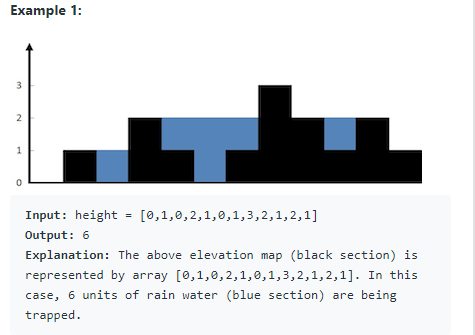


In [61]:
def trap(height):
    # Brute Force
    if not height or len(height)<3:
        return 0
    
    volume = 0
    left, right = 0, len(height) -1
    l_max, r_max = height[left], height[right]
    while left < right:
        l_max, r_max = max(height[left], l_max), max(height[right], r_max)
        # KEY, 只要抓住 左邊 跟 右邊 的最高點, 每次加的水, 一定就是比較小的 - 目前高度
        if l_max <= r_max:
            volume += l_max - height[left]
            left +=1
        else:
            volume += r_max - height[right]
            right -= 1
        print(left, right, l_max, r_max, volume)
    return volume
            
                                 
    
    
    

[DP solution](https://leetcode.com/problems/trapping-rain-water/discuss/346640/Pythonically-trapping-rain-water-with-common-sense-%22dynamically%22)
**The idea is to know what the max height is, to the left and right of every index.**  
Think about it- at any given index, there can only be trapped rain water above it if the min(max_height_to_the_left, max_height_to_the_right) is bigger than the height at this particular index.  
So there are 3 things to do.  
<br>
For every index, find max_height_to_the_left. Store in a "maxleft" array.  
For every index, find max_height_to_the_right. Store in a "maxright" array.  
Add min(max_height_to_the_left, max_height_to_the_right) - height(idx) for every idx to a sum. Return this sum.  

In [65]:
def trap(height):
    size = len(height)
    
    left = 0
    maxleft = height[:]
    for i in range(size):
        # record the max height of the left
        maxleft[i] = left
        if height[i] > left:
            left = height[i]
            
    right = 0
    maxright = height[:]
    for i in range(size-1,-1,-1):
        # record the max height of the right
        maxright[i] = right
        if height[i] > right:
            right = height[i]
        
    res = 0
    for idx in range(size):
        if min(maxleft[idx], maxright[idx]) > height[idx]:
            res += min(maxleft[idx], maxright[idx]) - height[idx]
            
    return res

In [66]:
height = [0,1,0,2,1,0,1,3,2,1,2,1]
trap(height)

6

# 128. Longest Consecutive Sequence
Given an unsorted array of integers nums, return the length of the longest consecutive elements sequence.


In [30]:
def longestConsecutive(nums):
    nums = set(nums)
    best = 0
    for x in nums:
#         means x is the streak start
        if x -1 not in nums:
            y = x+1
            while y in nums:
                y +=1
            
            best = max(best, y - x)
    return best


In [31]:
# nums = [0,3,7,2,5,8,4,6,0,1]
nums = [100,4,200,1,3,2]
# nums = [1,2,3,3,3,4,5,6,7,8,9,10]

longestConsecutive(nums)

1
2
3
100
4
200


# [164. Maximum Gap](https://leetcode.com/problems/maximum-gap/discuss/692005/Python-Very-Detailed-explanation-using-buckets)
Given an integer array nums, return the maximum difference between two successive elements in its sorted form. If the array contains less than two elements, return 0.  
<br>
You must write an algorithm that runs in linear time and uses linear extra space.  

In [49]:
def maximumGap(nums):
    # O(N^2), exceed time limit
    nums = set(nums) 
    
    if len(nums) <2:
        return 0
    
    max_element = max(nums)
    gap = 0
    for x in nums:
        y = x + 1
        while y <= max_element:
            if y in nums:
                break
            y +=1
        gap = max(gap, y -x)
    return gap


In [65]:
def maximumGap(nums):
    if len(nums) < 2 or min(nums) == max(nums):
        return 0
    minimum, maximum = min(nums), max(nums)
    size = (maximum - minimum) // (len(nums) -1 ) or 1
    buckets = [[None, None] for _ in range(( maximum - minimum )//size+1)]
    for num in nums:
        # getting the bucket number in which it falls into
        bucket = buckets[ ( num - minimum )//size ]
        bucket[0] = num if bucket[0] is None else min(bucket[0], num)
        bucket[1] = num if bucket[1] is None else max(bucket[1], num)
    # discard first bucket
    buckets = [bucket for bucket in buckets if bucket[0] is not None]
    print(buckets)
    gap = 0
    for i in range(1, len(buckets)):
        diff = buckets[i][0] - buckets[i-1][1]
        gap = max(gap,diff)
    return  gap

In [67]:
nums = [1,3,6,9,100]
# nums = [9,1]
# nums = [1,1,1,1]


maximumGap(nums)

[[1, 9], [100, 100]]


91

In [68]:
5//4

1

# [287. Find the Duplicate Number](https://leetcode.com/problems/find-the-duplicate-number/discuss/72852/Python-same-solution-as-142-Linked-List-Cycle-II)
Given an array of integers nums containing n + 1 integers where each integer is in the range [1, n] inclusive.  

There is **only one repeated number in nums, return this repeated number.**


**You must solve the problem without modifying the array nums and uses only constant extra space.**

In [77]:
def findDuplicate(nums):
    # exceed time
    for i in range(len(nums)):
        num = nums[i]
        if num in nums[i+1:]:
            return num


In [81]:
def findDuplicate(nums):
    # KEY, since it only contian n+1 integers in range [1,n]
    # nums[a]= b can be seen as a.next = b. Then the queation is reduced
    # to find cycle in linked list II
    # 重點在於要轉換成 linked list 找cycle來想
    slow = fast = finder = 0
    while True:
        print("idx:", slow,"value:", nums[slow])
        slow = nums[slow] # slow= slow.next
        print("idx:", fast,"value:", nums[nums[fast]])
        
        fast = nums[nums[fast]] # fast = fast.next.next
        
        if slow == fast:
            # 這時slow, fast是在 loop 開始的起點
            # finder 在剛開始
            while finder != slow:
                finder = nums[finder]
                slow = nums[slow]
            return finder
            
    

In [82]:

nums = [1,3,4,2,3]

# nums = [1,1]
findDuplicate(nums)

idx: 0 value: 1
idx: 0 value: 3
idx: 1 value: 3
idx: 3 value: 4
idx: 3 value: 2
idx: 4 value: 2


3

# 142. Linked List Cycle II
Given a linked list, return the node where the cycle begins. If there is no cycle, return null.

In [ ]:
def detectCycle(head):
    
    slow = fast = head

    while fast is not None and fast.next:
        slow = slow.next
        fast = fast.next.next

        if slow == fast:
            break

    if fast is None or fast.next is None:
        return None


    fast = head
    # KEY 如果code run到這裡 代表 fast 跟 fast.next不是Null
    # 而且現在 fast 跟 slow 都是在於兩個指針相遇的點
    # 這時將 fast 拉回原點
    # 當slow 跟 fast meet的時候就會是 loop起點
    # https://www.youtube.com/watch?v=UkKBPGt5Nok&ab_channel=%E7%BD%97%E7%BF%94%E8%80%81%E5%B8%88
    while fast != slow:
        slow = slow.next
        fast = fast.next

    return slow


# 125. Valid Palindrome

In [107]:
def isPalindrome(s):
    import string 
    
    
    specialChars = string.punctuation
    for specialChar in specialChars:
        s = s.replace(specialChar, '')
    s = s.replace(' ','')
    s = s.lower()
    
    for i in range(len(s)//2):
        print(i, s[i],s[-i-1])
        if s[i] != s[-i-1]:
            return False
    return True
                  

    

In [109]:
s = "A man, a plan, a canal: Panama"
s = "race a car"
s = 'a.@'
isPalindrome(s)

True

In [111]:
import string 

print(string.punctuation)
print(string.ascii_lowercase)
print(string.ascii_uppercase)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
abcdefghijklmnopqrstuvwxyz
ABCDEFGHIJKLMNOPQRSTUVWXYZ
